In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = "Sleep Deprivation Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
sns.set(style="whitegrid")
good_sleep_threshold = 7  # Assuming 7 or more hours is considered good sleep
good_sleepers = df[df['Sleep_Hours'] >= good_sleep_threshold]
print("Participants who got good hours of sleep:")
print(good_sleepers)

Participants who got good hours of sleep:
   Participant_ID  Sleep_Hours  Sleep_Quality_Score  Daytime_Sleepiness  \
1              P2         8.70                   12                  14   
2              P3         7.39                   17                  10   
7              P8         8.20                   14                  21   
9             P10         7.25                    0                   9   
11            P12         8.82                    8                  24   
12            P13         7.99                    0                  20   
25            P26         7.71                    8                  19   
33            P34         8.69                    4                   4   
34            P35         8.79                    2                   0   
35            P36         7.85                   11                  18   
38            P39         7.11                    0                  23   
43            P44         8.46                    2       

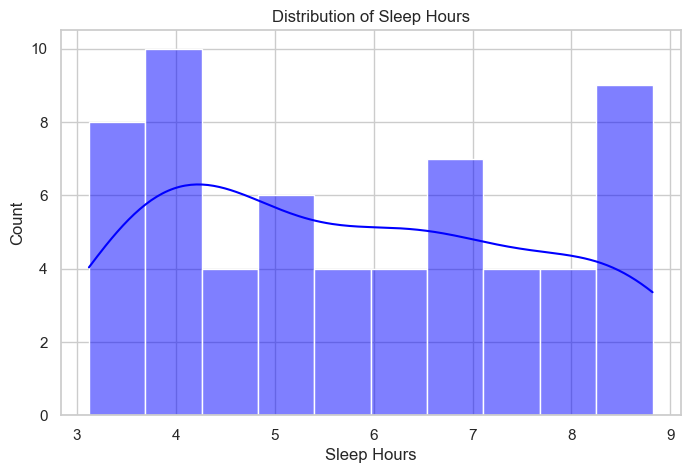

In [6]:
# Plot 1: General Overview of Distribution of Sleep Hours
plt.figure(figsize=(8,5))
sns.histplot(df['Sleep_Hours'], bins=10, kde=True, color='blue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.show()

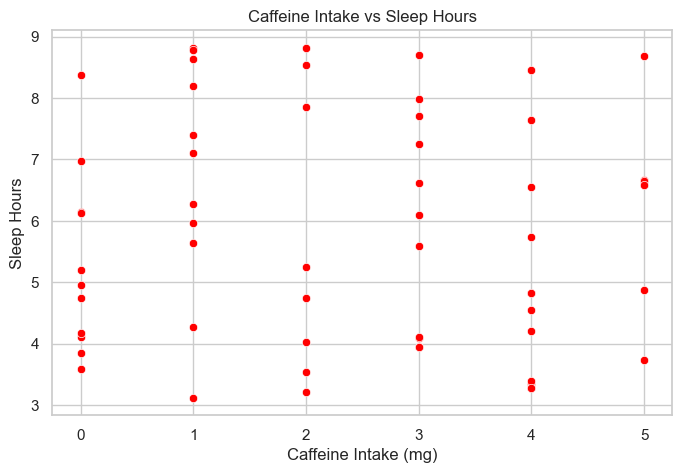

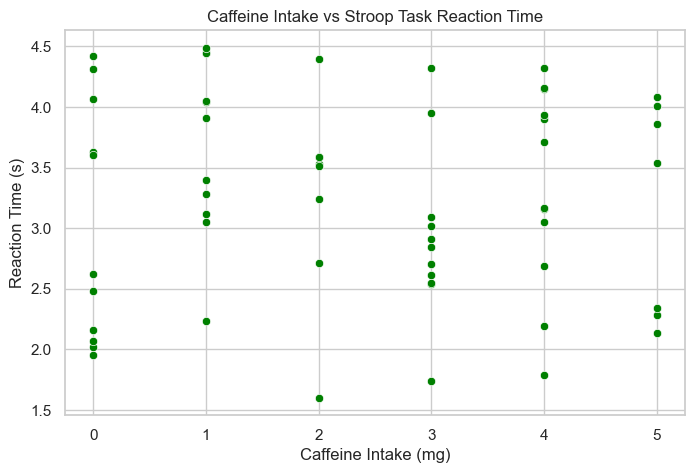

Correlation between Caffeine Intake, Sleep Hours, and Cognitive Performance:
                           Caffeine_Intake  Sleep_Hours  \
Caffeine_Intake                   1.000000    -0.036469   
Sleep_Hours                      -0.036469     1.000000   
Stroop_Task_Reaction_Time        -0.028332     0.056203   
N_Back_Accuracy                  -0.187181    -0.110396   
PVT_Reaction_Time                -0.044927    -0.174171   

                           Stroop_Task_Reaction_Time  N_Back_Accuracy  \
Caffeine_Intake                            -0.028332        -0.187181   
Sleep_Hours                                 0.056203        -0.110396   
Stroop_Task_Reaction_Time                   1.000000         0.012468   
N_Back_Accuracy                             0.012468         1.000000   
PVT_Reaction_Time                           0.090767         0.104692   

                           PVT_Reaction_Time  
Caffeine_Intake                    -0.044927  
Sleep_Hours                        

In [7]:
# Answering the question: How much does caffeine intake affect sleep duration and cognitive performance?
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Caffeine_Intake'], y=df['Sleep_Hours'], color='red')
plt.title('Caffeine Intake vs Sleep Hours')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Sleep Hours')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Caffeine_Intake'], y=df['Stroop_Task_Reaction_Time'], color='green')
plt.title('Caffeine Intake vs Stroop Task Reaction Time')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Reaction Time (s)')
plt.show()

corr_caffeine_effects = df[['Caffeine_Intake', 'Sleep_Hours', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy', 'PVT_Reaction_Time']].corr()
print("Correlation between Caffeine Intake, Sleep Hours, and Cognitive Performance:")
print(corr_caffeine_effects)

In [4]:

# Create binary classification target
df['Sleep_Quality'] = df['Sleep_Hours'].apply(lambda x: 'Good' if x >= 7 else 'Poor')


In [13]:

# Select features and define X and y
features = ['Caffeine_Intake', 'PVT_Reaction_Time', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy']
X = df[features]
y_class = df['Sleep_Quality']  # Classification target
y_reg = df['Sleep_Hours']      # Regression target


In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


In [15]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_class)
predictions_class = knn.predict(X_test)

print("KNN Classification Accuracy:", accuracy_score(y_test_class, predictions_class))
print(classification_report(y_test_class, predictions_class))


KNN Classification Accuracy: 0.25
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         3
        Poor       0.50      0.33      0.40         9

    accuracy                           0.25        12
   macro avg       0.25      0.17      0.20        12
weighted avg       0.38      0.25      0.30        12



In [18]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

regressor = RandomForestRegressor()
regressor.fit(X_train_reg, y_train_reg)
predictions_reg = regressor.predict(X_test_reg)

import numpy as np
mse = mean_squared_error(y_test_reg, predictions_reg)
rmse = np.sqrt(mse)
print("Random Forest Regression RMSE:", rmse)


Random Forest Regression RMSE: 2.375546090375857
